### Video Game Sales

#### Data Diri

**Nama:** Bayu Setiawan

**NIM:** 026

#### Penjelasan Singkat
Dataset penjualan video game dari berbagai *platform* 

[Sumber bisa dilihat di sini](https://www.kaggle.com/datasets/gregorut/videogamesales)

##### Tampilan Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("./dataset/vgsales.csv")
df = df.dropna()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Fitting Dataset

Kita akan menggunakan column `NA_Sales (North America Sales)` dan `Global_Sales` sebagai data yang akan dilatih. Yang dimana dari data tersebut kita akan memprediksi `Genre` dari game tersebut

In [28]:
df_subset = df[["NA_Sales","Global_Sales"]]

ss = StandardScaler()

x_scaled = ss.fit_transform(df_subset)

print(x_scaled)

[[50.1264692  52.44642277]
 [35.03661496 25.32966301]
 [18.94968736 22.50951999]
 ...
 [-0.32301125 -0.33874277]
 [-0.32301125 -0.33874277]
 [-0.31085182 -0.33874277]]


##### Pelatihan Model (K-Means Clustering)

Kita akan menggunakan algoritma `K-Means Clustering` yang dimana akan ada 12 cluster untuk 12 genre yang ada

In [36]:
model_kmeans = KMeans(n_clusters=12)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=12)

##### Crosstab

Akan ditampilkan hasil crosstab masing-masing label dari hasil model

In [38]:
labels = model_kmeans.labels_

df_kmeans = pd.DataFrame({ 'labels': labels, 'genres': df['Genre'] })
crosstab = pd.crosstab(df_kmeans['labels'], df_kmeans['genres'])
print(crosstab)

genres  Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
labels                                                                
0          728        118       170   345       200      75     274   
1            0          0         0     2         2       0       1   
2          109         11        46    54        51      13      47   
3            4          0         0     1         3       0       1   
4            5          1         1     3         5       2       4   
5            0          0         0     0         0       0       0   
6         2005       1107       521  1145       454     437     747   
7           68          4        17    20        26       5      17   
8           11          2         3    10         6       5       6   
9            0          0         0     0         1       1       0   
10          25          1         6    11        19       1      11   
11         296         30        72    95       108      31     117   

genre

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


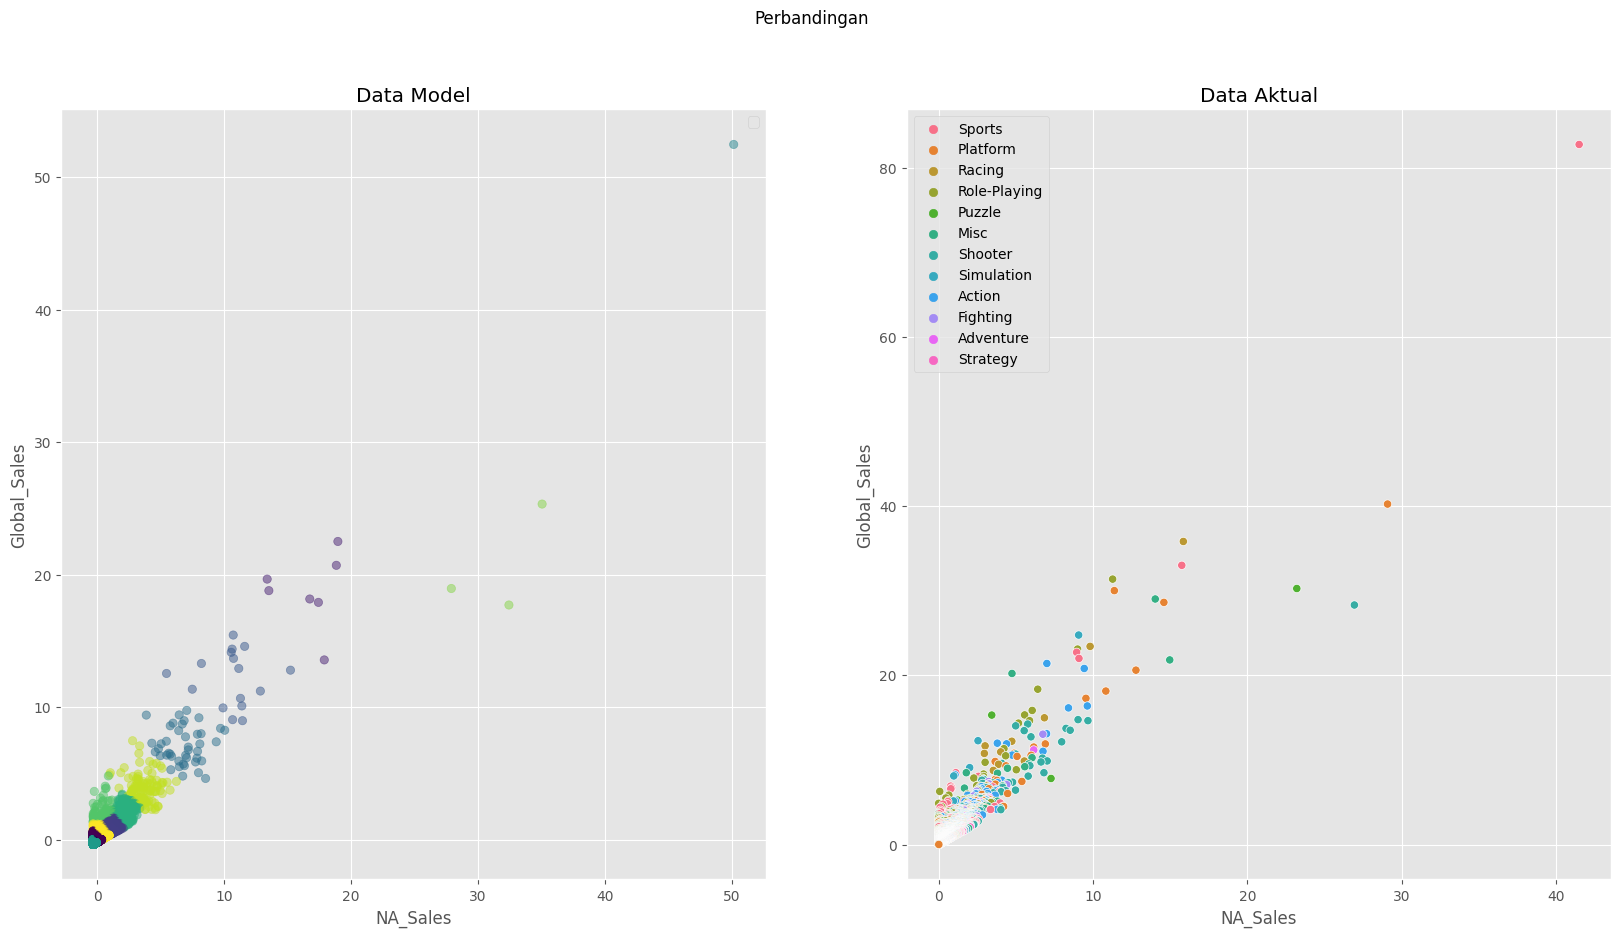

In [44]:
plt.figure(figsize=(20, 10))
plt.suptitle("Perbandingan")


plt.subplot(1,2,1)
plt.title("Data Model")

xs = x_scaled[:, 0]
ys = x_scaled[:, 1]
plt.scatter(xs, ys, alpha=0.5, c=labels)
plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")

plt.subplot(1,2,2)
plt.title("Data Aktual")
df_aktual = df[["NA_Sales", "Global_Sales", "Genre"]]
sns.scatterplot(x="NA_Sales", y="Global_Sales", data = df_aktual, hue="Genre")

plt.legend()
plt.show()


